# Q1 Bayesian Linear Regression (Single-Dollar Inline Math)

We consider the standard linear-Gaussian regression model:

$y = X \beta + \varepsilon,\ \text{where}\ \varepsilon \sim \mathcal{N}(0,\sigma^2 I),$

and we assume:

1. A Gaussian (multivariate normal) prior on $\beta$.
2. An inverse-gamma prior on $\sigma^2$.

We want to derive:

1. The posterior distribution $p(\beta \mid y, X, \Sigma = \sigma^2 I)$.
2. The posterior distribution $p(\sigma^2 \mid y, X)$ under an inverse-gamma prior.

Let $n$ be the number of observations and let $\beta \in \mathbb{R}^d.$

---

## 1. Posterior for $\beta$ given $\sigma^2$

### Model setup and likelihood

The likelihood for observations $y \in \mathbb{R}^n$ given parameters $\beta$ and known variance $\sigma^2$ is:

$p(y \mid X,\beta,\sigma^2) \;=\; \frac{1}{(2\pi \sigma^2)^{\,n/2}} \,\exp\!\Bigl(-\frac{1}{2\sigma^2}\,(y - X\beta)^\top (y - X\beta)\Bigr).$

Here, $X$ is an $n \times d$ design matrix, and the errors $\varepsilon = y - X\beta$ satisfy $\varepsilon \sim \mathcal{N}(0,\sigma^2 I).$

### Prior on $\beta$

We assume $\beta$ has a multivariate normal prior:

$\beta \sim \mathcal{N}(\beta_0,\Sigma_\beta).$

In density form:

$p(\beta) \;=\; \frac{1}{\sqrt{(2\pi)^d\,\det(\Sigma_\beta)}}\,\exp\!\Bigl(-\frac{1}{2}\,(\beta - \beta_0)^\top \Sigma_\beta^{-1} (\beta - \beta_0)\Bigr).$

### Posterior derivation

By Bayes' rule (ignoring constants not depending on $\beta$),

$p(\beta \mid y, X, \sigma^2)\;\propto\; p(y \mid X,\beta,\sigma^2)\,p(\beta).$

- **Likelihood exponent**: $-\frac{1}{2\sigma^2}\,(y - X\beta)^\top (y - X\beta).$
- **Prior exponent**: $-\frac{1}{2}\,(\beta - \beta_0)^\top \Sigma_\beta^{-1} (\beta - \beta_0).$

Combine them into one exponent:

$-\frac{1}{2}\Bigl[\frac{1}{\sigma^2}\,(y - X\beta)^\top (y - X\beta)\;+\;(\beta - \beta_0)^\top \Sigma_\beta^{-1}(\beta - \beta_0)\Bigr].$

Recognize this as a quadratic form in $\beta$, giving a normal posterior:

$\beta \mid (y, X, \sigma^2) \;\sim\; \mathcal{N}(\mu_{\beta\mid y},\,\Sigma_{\beta\mid y}),$

where

- **Posterior covariance**:
  
  $\Sigma_{\beta\mid y} = \Bigl(\frac{1}{\sigma^2}X^\top X + \Sigma_\beta^{-1}\Bigr)^{-1},$

- **Posterior mean**:
  
  $\mu_{\beta\mid y} = \Sigma_{\beta\mid y}\Bigl(\frac{1}{\sigma^2}X^\top y + \Sigma_\beta^{-1}\,\beta_0\Bigr).$

---

## 2. Posterior for $\sigma^2$ under an inverse-gamma prior

Assume we place an **inverse-gamma** prior on $\sigma^2$, independent of $\beta$:

$\sigma^2 \sim \mathrm{IG}(\alpha^*,\beta^*),$

meaning

$p(\sigma^2) = \frac{(\beta^*)^{\alpha^*}}{\Gamma(\alpha^*)}\,(\sigma^2)^{-\alpha^*-1}\,\exp\!\Bigl(-\frac{\beta^*}{\sigma^2}\Bigr).$

### Conditional posterior of $\sigma^2$

From the model $\varepsilon = y - X\beta \sim \mathcal{N}(0,\sigma^2 I)$, the likelihood factor in $\sigma^2$ is

$p(y \mid \beta, X, \sigma^2)\;\propto\;(\sigma^2)^{-\,n/2}\,\exp\!\Bigl(-\frac{(y - X\beta)^\top(y - X\beta)}{2\,\sigma^2}\Bigr).$

Multiplying by the inverse-gamma prior and collecting terms in $\sigma^2$, we get

$p(\sigma^2 \mid y, \beta, X)\;\propto\;(\sigma^2)^{-\,n/2}\,\exp\!\Bigl(-\frac{(y - X\beta)^\top(y - X\beta)}{2\,\sigma^2}\Bigr)\;\times\;(\sigma^2)^{-\alpha^*-1}\,\exp\!\Bigl(-\frac{\beta^*}{\sigma^2}\Bigr).$

This is an inverse-gamma kernel, leading to

$\sigma^2 \mid (y,\beta,X) \;\sim\; \mathrm{IG}\!\Bigl(\alpha^* + \frac{n}{2},\;\beta^* + \frac12\,(y - X\beta)^\top (y - X\beta)\Bigr).$

Hence, conditionally on $\beta$, the posterior for $\sigma^2$ is inverse-gamma with updated parameters.

---

## Final Summary

1. **Posterior for $\beta$** (with known $\sigma^2$):

   $\beta \mid (y, X, \sigma^2) \;\sim\; \mathcal{N}\!\Bigl(\Sigma_{\beta\mid y}\bigl(\frac{1}{\sigma^2}X^\top y + \Sigma_\beta^{-1}\beta_0\bigr),\;\bigl(\frac{1}{\sigma^2}X^\top X + \Sigma_\beta^{-1}\bigr)^{-1}\Bigr).$

2. **Posterior for $\sigma^2$** (conditional on $\beta$, with inverse-gamma prior):

   $\sigma^2 \mid (y, \beta, X) \;\sim\; \mathrm{IG}\!\Bigl(\alpha^* + \frac{n}{2},\;\beta^* + \frac12\,(y - X\beta)^\top(y - X\beta)\Bigr).$

These are the standard conjugate updates for Gaussian linear regression with a normal prior on $\beta$ and an inverse-gamma prior on $\sigma^2$.


Shape of X: (5148, 2)
Length of y: 5148


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 80 seconds.


          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
betas[0] -0.00  0.0   -0.00    -0.00        0.0      0.0   3361.21   4070.18   
betas[1]  1.00  0.0    1.00     1.01        0.0      0.0   3264.50   3942.15   
sigma     0.26  0.0    0.25     0.26        0.0      0.0   5069.44   4801.32   

          r_hat  
betas[0]    1.0  
betas[1]    1.0  
sigma       1.0  


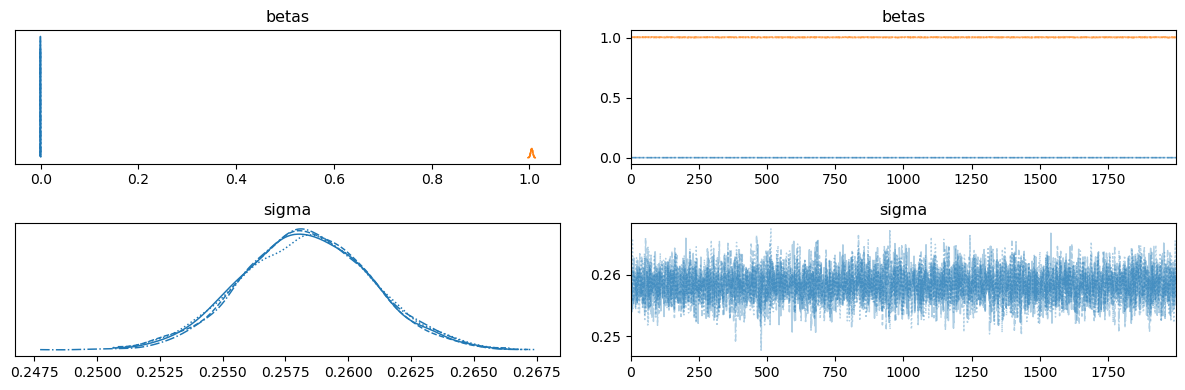

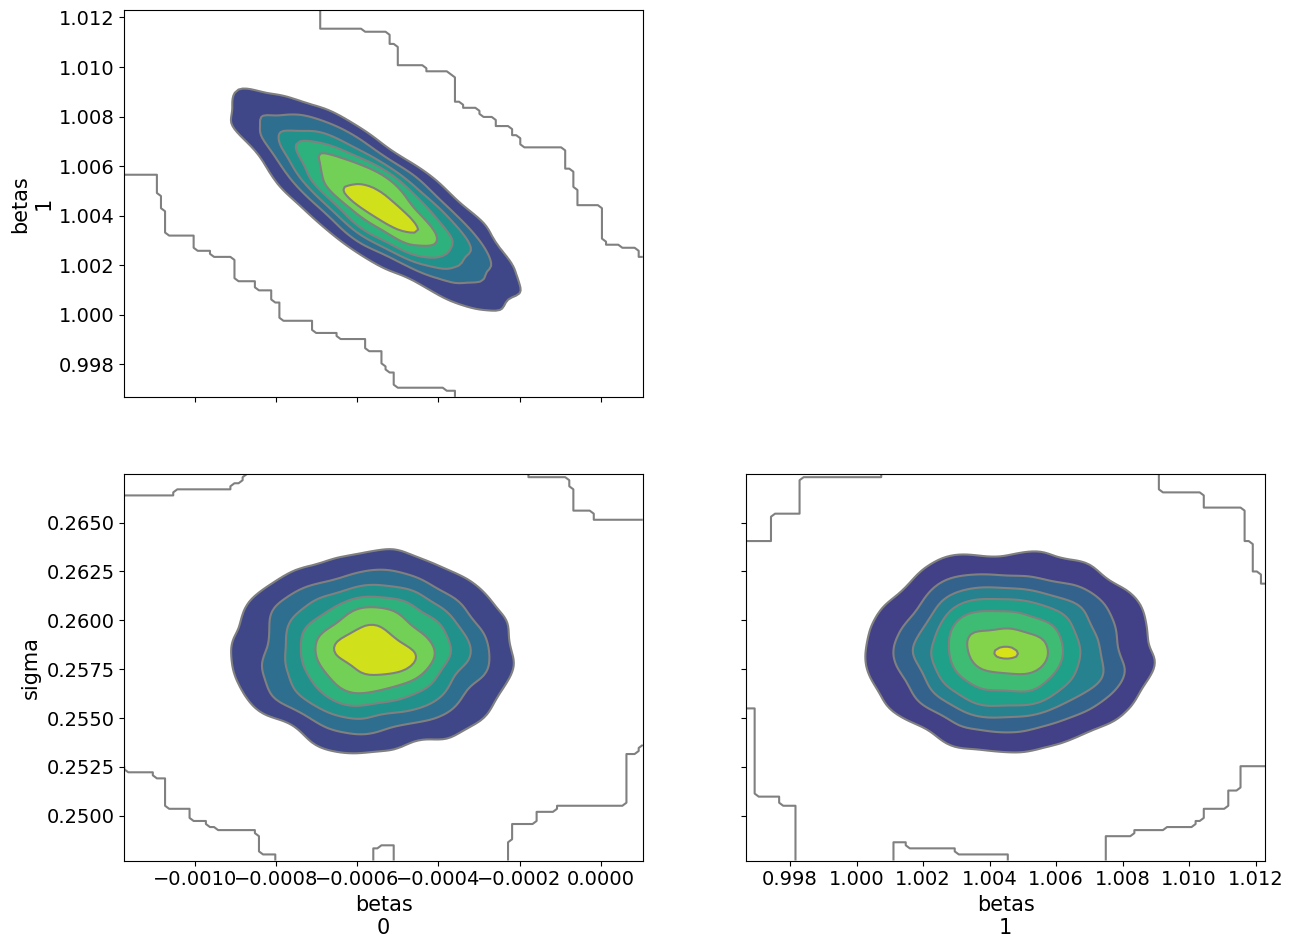

Sampling: [y_obs]


Posterior Predictive shape: (4, 2000, 5148)
y_pred_mean shape: (5148,)
y shape: (5148,)


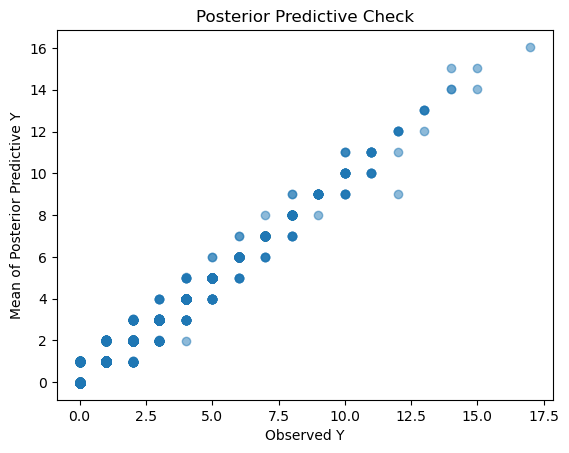

In [17]:
#Q2
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

#---------------------------------------------------------
# 1) LOAD & INSPECT YOUR DATA
#---------------------------------------------------------
data = pd.read_excel("portugal.xlsx")

# Example: choose "children" as the target, and ["age", "pregnancies"] as predictors.
# Adjust to match your real modeling goal:
y = data["children"].values
X = data[["age", "pregnancies"]].values

# Optionally add an intercept by uncommenting:
# X = np.column_stack([np.ones(X.shape[0]), X])

print("Shape of X:", X.shape)
print("Length of y:", len(y))

#---------------------------------------------------------
# 2) SPECIFY THE BAYESIAN MODEL
#---------------------------------------------------------
with pm.Model() as model:
    # Number of predictors
    p = X.shape[1]
    
    # Normal priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=10, shape=p)
    
    # Non–inverse-gamma prior for sigma: for example, a HalfNormal
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # Likelihood: y ~ Normal(X @ betas, sigma)
    mu = pm.math.dot(X, betas)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # MCMC sampling
    trace = pm.sample(
        draws=2000,
        tune=1000,
        target_accept=0.9
    )

#---------------------------------------------------------
# 3) DIAGNOSTICS & POSTERIOR SUMMARIES
#---------------------------------------------------------
summary_df = az.summary(trace, var_names=["betas", "sigma"], round_to=2)
print(summary_df)

# Trace plots
az.plot_trace(trace, var_names=["betas", "sigma"])
plt.tight_layout()
plt.show()

# Pairwise correlations in the posterior
az.plot_pair(trace, var_names=["betas", "sigma"], kind="kde")
plt.show()

#---------------------------------------------------------
# 4) POSTERIOR PREDICTIVE CHECK
#---------------------------------------------------------
with model:
    ppc = pm.sample_posterior_predictive(
        trace,
        var_names=["y_obs"],
        random_seed=42,
        return_inferencedata=False
    )

print("Posterior Predictive shape:", ppc["y_obs"].shape)

# Take the mean over chains & draws to get a single predicted value per data point
y_pred_mean = ppc["y_obs"].mean(axis=(0,1))

print("y_pred_mean shape:", y_pred_mean.shape)
print("y shape:", y.shape)

# Simple scatter plot of predicted vs. observed
plt.scatter(y, y_pred_mean, alpha=0.5)
plt.xlabel("Observed Y")
plt.ylabel("Mean of Posterior Predictive Y")
plt.title("Posterior Predictive Check")
plt.show()



Columns:
 Index(['age', 'ageMarried(几岁时结婚)', 'monthsSinceM(结婚已经多少月)', 'pregnancies',
       'children', 'sons', 'region', 'literacy'],
      dtype='object')

Dtypes:
 age                       int64
ageMarried(几岁时结婚)        object
monthsSinceM(结婚已经多少月)     int64
pregnancies               int64
children                  int64
sons                      int64
region                   object
literacy                 object
dtype: object

Shape: (5148, 8)

Before adding outliers:
X.shape = (5148, 4)   y.shape = (5148,)

Inflated 257 points in y by factor of 3.

Final X_scaled.shape = (5148, 4)
Final y.shape = (5148,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas, nu, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 386 seconds.



Posterior summary:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,34.634,0.058,34.520,34.737,0.001,0.000,8794.0,5228.0,1.0
betas[0],7.563,0.063,7.446,7.682,0.001,0.000,8429.0,5447.0,1.0
betas[1],-1.457,0.335,-2.086,-0.840,0.005,0.003,5044.0,4622.0,1.0
betas[2],1.172,0.342,0.523,1.802,0.005,0.003,5006.0,4684.0,1.0
betas[3],0.127,0.085,-0.035,0.285,0.001,0.001,9832.0,5094.0,1.0
nu,1.397,0.037,1.330,1.468,0.000,0.000,7574.0,5695.0,1.0
sigma,2.786,0.052,2.687,2.881,0.001,0.000,7803.0,5558.0,1.0


Sampling: [y_obs]



Posterior predictive InferenceData groups: ['posterior_predictive', 'observed_data']


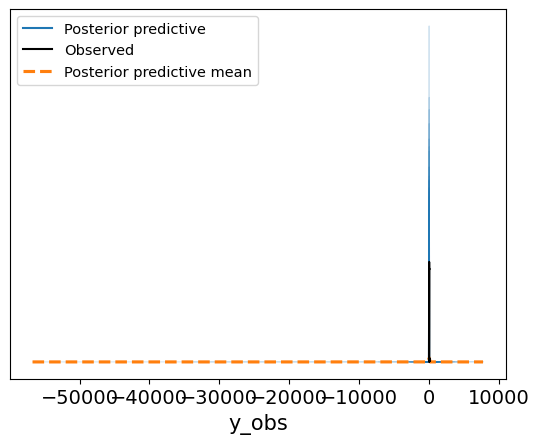


Potential outliers by large residual: 257 points


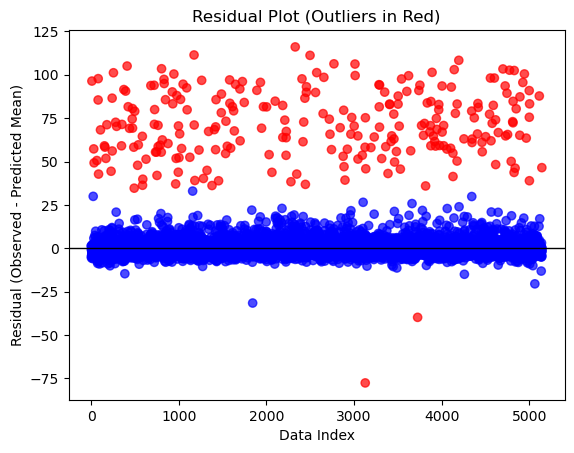


Approximate leverage stats:
Min leverage: 7.4666101470724114e-06
Max leverage: 0.030069265968047203
Mean leverage: 0.0007770007770008383
High-leverage points: 563


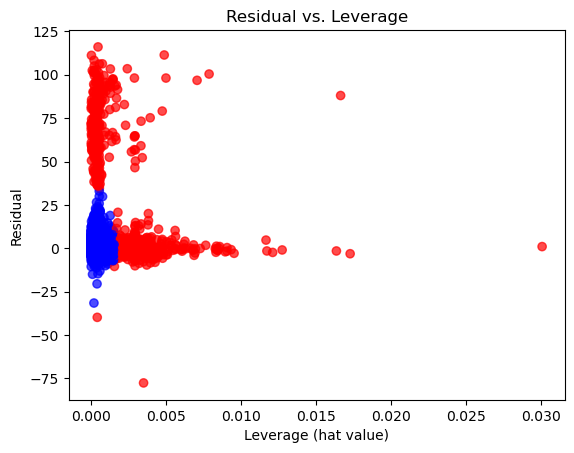

In [21]:
#Q3
!pip install pymc arviz openpyxl --quiet

import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------------------
# 1) Load data
# ---------------------------------------------------------------------
data = pd.read_excel("portugal.xlsx")
print("Columns:\n", data.columns)
print("\nDtypes:\n", data.dtypes)
print("\nShape:", data.shape)

# ---------------------------------------------------------------------
# 2) Choose target & predictors (must be numeric)
# ---------------------------------------------------------------------
y_col = "age"  
X_cols = ["monthsSinceM(结婚已经多少月)", "pregnancies", "children", "sons"]

# Convert target to numeric & drop missing
data[y_col] = pd.to_numeric(data[y_col], errors="coerce")
data = data.dropna(subset=[y_col])

# Convert each predictor to numeric & impute missing with mean
for col in X_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")
    data[col].fillna(data[col].mean(), inplace=True)

# Make final arrays
X = data[X_cols].values
y = data[y_col].astype(float).values  # cast to float so we can multiply by 3 in place

print("\nBefore adding outliers:")
print("X.shape =", X.shape, "  y.shape =", y.shape)

# ---------------------------------------------------------------------
# 3) Introduce artificial outliers in y
# ---------------------------------------------------------------------
np.random.seed(42)
outlier_fraction = 0.05
n_outliers = int(outlier_fraction * len(y))
if n_outliers > 0:
    outlier_indices = np.random.choice(len(y), size=n_outliers, replace=False)
    y[outlier_indices] *= 3.0  
    print(f"\nInflated {n_outliers} points in y by factor of 3.")
else:
    print("\nNo outliers were added (dataset too small?).")

# ---------------------------------------------------------------------
# 4) Scale predictors
# ---------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFinal X_scaled.shape =", X_scaled.shape)
print("Final y.shape =", y.shape)

if len(y) == 0:
    print("No rows left; cannot run robust regression.")
else:
    # ---------------------------------------------------------------------
    # 5) Build & sample from a robust Bayesian regression (Student T-likelihood)
    # ---------------------------------------------------------------------
    with pm.Model() as robust_model:
        beta0 = pm.Normal("beta0", mu=0, sigma=10)
        betas = pm.Normal("betas", mu=0, sigma=1, shape=X_scaled.shape[1])
        nu = pm.Exponential("nu", 1/30)  # degrees of freedom
        sigma = pm.HalfNormal("sigma", sigma=10)
        
        mu = beta0 + pm.math.dot(X_scaled, betas)
        y_obs = pm.StudentT("y_obs", mu=mu, sigma=sigma, nu=nu, observed=y)
        
        # Return an InferenceData object
        trace = pm.sample(draws=2000, tune=1000, target_accept=0.9, return_inferencedata=True)

    print("\nPosterior summary:")
    display(az.summary(trace, var_names=["beta0", "betas", "nu", "sigma"]))

    # ---------------------------------------------------------------------
    # 6) Posterior Predictive (InferenceData) => pass to plot_ppc
    # ---------------------------------------------------------------------
    with robust_model:
        ppc_idata = pm.sample_posterior_predictive(
            trace,
            var_names=["y_obs"],
            return_inferencedata=True  # <--- crucial
        )

    # Now ppc_idata has posterior_predictive.y_obs and observed_data.y_obs
    print("\nPosterior predictive InferenceData groups:", ppc_idata.groups())

    # Plot PPC directly from InferenceData
    az.plot_ppc(ppc_idata, var_names=["y_obs"], num_pp_samples=100)
    plt.show()

    # If you want the actual predictive samples as a NumPy array:
    # y_pp_samples = ppc_idata.posterior_predictive["y_obs"].values
    # shape is (chain, draw, n_obs)

    # ---------------------------------------------------------------------
    # 7) Identify Outliers by Large Residuals
    #    => we can pick a single chain/draw or the mean across chains/draws
    # ---------------------------------------------------------------------
    y_pp_mean = ppc_idata.posterior_predictive["y_obs"].mean(dim=("chain", "draw")).values
    # shape: (n_obs,)

    residuals = y - y_pp_mean
    resid_std = residuals.std()
    outlier_mask = np.abs(residuals) > 2.0 * resid_std
    print(f"\nPotential outliers by large residual: {np.sum(outlier_mask)} points")

    plt.scatter(range(len(residuals)), residuals, c=outlier_mask, cmap="bwr", alpha=0.7)
    plt.axhline(0, color="k", linewidth=1)
    plt.xlabel("Data Index")
    plt.ylabel("Residual (Observed - Predicted Mean)")
    plt.title("Residual Plot (Outliers in Red)")
    plt.show()

    # ---------------------------------------------------------------------
    # 8) Approximate Hat-Matrix Diagonals
    # ---------------------------------------------------------------------
    # We'll use the posterior mean for betas in a standard (X'X)^{-1} approach
    beta0_mean = trace.posterior["beta0"].mean().values
    betas_mean = trace.posterior["betas"].mean(dim=("chain", "draw")).values

    # For a classical hat matrix:
    Xaug = X_scaled
    XtX_inv = np.linalg.inv(Xaug.T @ Xaug)
    H = Xaug @ XtX_inv @ Xaug.T
    leverage = np.diag(H)

    print("\nApproximate leverage stats:")
    print("Min leverage:", leverage.min())
    print("Max leverage:", leverage.max())
    print("Mean leverage:", leverage.mean())

    high_leverage_mask = leverage > 2.0 * leverage.mean()
    print(f"High-leverage points: {np.sum(high_leverage_mask)}")

    colors = np.where(outlier_mask | high_leverage_mask, "r", "b")
    plt.scatter(leverage, residuals, c=colors, alpha=0.7)
    plt.xlabel("Leverage (hat value)")
    plt.ylabel("Residual")
    plt.title("Residual vs. Leverage")
    plt.show()
